En este data set se hace el carga, preprocesamiento, visualizacion con t-sne y PCA

 ** t-SNE visualization of 20 News group dataset**

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

## Importing Dataset

In [ ]:
dataset = fetch_20newsgroups()

In [ ]:
print("Dataset Structure", dataset.keys())

Dataset Structure dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
df = pd.DataFrame()
df["data"] = dataset["data"]
df["target"] = dataset["target"]
df["target_names"] = df.target.apply(lambda row: dataset["target_names"][row])
df.head()

data  target  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14   

            target_names  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space

                    Category  Document Count
0                alt.atheism             799
1              comp.graphics             973
2    comp.os.ms-windows.misc             985
3   comp.sys.ibm.pc.hardware             982
4      comp.sys.mac.hardware             963
5             comp.windows.x             988
6               misc.forsale             975
7                  rec.autos             990
8            rec.motorcycles             996
9         rec.sport.baseball             994
10          rec.sport.hockey             999
11                 sci.crypt             991
12           sci.electronics             984
13                   sci.med             990
14                 sci.space             987
15    soc.religion.christian             997
16        talk.politics.guns             910
17     talk.politics.mideast             940
18        talk.politics.misc             775
19        talk.religion.misc             628


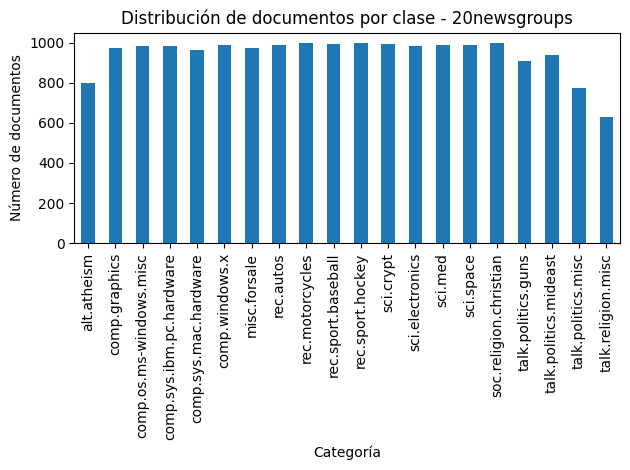

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos 20newsgroups
newsgroups_data = fetch_20newsgroups(subset='all')

# Obtener las etiquetas (target)
labels = newsgroups_data.target

# Obtener los nombres de las categorías
category_names = newsgroups_data.target_names

# Contar la cantidad de documentos por cada clase
class_counts = pd.Series(labels).value_counts().sort_index()

# Crear un DataFrame para mostrar la cantidad de documentos por clase
class_distribution = pd.DataFrame({
    'Category': category_names,
    'Document Count': class_counts
})

# Mostrar la distribución de clases
print(class_distribution)

# Visualizar la distribución con un gráfico de barras
class_distribution.plot(kind='bar', x='Category', y='Document Count', legend=False)
plt.title('Distribución de documentos por clase - 20newsgroups')
plt.ylabel('Número de documentos')
plt.xlabel('Categoría')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Text Cleaning

In [ ]:
from textblob import Word
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_text(text):
    return " ".join([ Word(word).lemmatize() for word in re.sub("[^A-Za-z0-9]+", " ", text).lower().split() if word not in stopword])

In [ ]:
stopword = stopwords.words('english')

In [ ]:
df["data_str"] = df.data.apply(lambda row: clean_text(row) )

In [ ]:
df[:10]

data  target  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14   
5  From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...      16   
6  From: bmdelane@quads.uchicago.edu (brian manni...      13   
7  From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...       3   
8  From: holmes7000@iscsvax.uni.edu\nSubject: WIn...       2   
9  From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...       4   

               target_names                                           data_str  
0                 rec.autos  lerxst wam umd edu thing subject car nntp post...  
1     comp.sys.mac.hardware  guykuo carson u washington edu guy kuo subject...  
2     comp.sys.mac.hardware  twillis ec ecn purdue edu thomas e willis subj...  
3             comp.graphics  jgreen amber joe green subject weitek p9000 or...  
4                 sci.space  jcm head cfa harvard edu jonathan mcdowell sub...  
5        talk.politics.guns  dfo vttoulu tko vtt fi foxvog douglas subject ...  
6                   sci.med  bmdelane quad uchicago edu brian manning delan...  
7  comp.sys.ibm.pc.hardware  bgrubb dante nmsu edu grubb subject ide v scsi...  
8   comp.os.ms-windows.misc  holmes7000 iscsvax uni edu subject win 3 0 ico...  
9     comp.sys.mac.hardware  kerr ux1 cso uiuc edu stan kerr subject sigma ...

## Tf-Idf Vectorization & t-SNE Dimensionality Reduction

TF-IDF (Term Frequency-Inverse Document Frequency) se usa para convertir el texto en una representación vectorial basada en la frecuencia de las palabras o n-gramas (combinaciones de palabras).


t-SNE (t-distributed Stochastic Neighbor Embedding) es una técnica de reducción de dimensionalidad que se usa para visualizar datos de alta dimensión, generalmente en dos dimensiones.


El código itera sobre diferentes valores de perplexity y rangos de n-gramas, y produce gráficos de los datos reducidos con t-SNE.

La perplejidad en t-SNE es un parámetro que define el "alcance" efectivo del vecino más cercano, o cuánto énfasis se pone en las relaciones locales entre puntos. Es una especie de "valor de suavizado" que influye en la distribución de probabilidad de proximidad entre puntos en el espacio de alta dimensión.

Formalmente, se dice que la perplejidad está relacionada con el número efectivo de vecinos que se consideran cuando el algoritmo estima qué puntos deberían ser cercanos en el espacio de baja dimensión.

El TfidfVectorizer se está configurando para generar vectores de características a partir del texto utilizando n-gramas. Aquí:

`n-gram_range=ngram:` Esto define el rango de n-gramas que se usarán para tokenizar el texto. El parámetro ngram varía en cada iteración del bucle.
(1, 1) significa unigrama (secuencias de una palabra).
(1, 2) significa unigrama y bigramas (secuencias de una o dos palabras).
(1, 3) significa unigrama, bigramas y trigramas (secuencias de una, dos o tres palabras).
(2, 2) significa solo bigramas.
(3, 3) significa solo trigramas.
En cada iteración, el vectorizador crea una representación numérica (matriz TF-IDF) de los textos, basada en las secuencias de palabras definidas por el n-grama en uso.


In [ ]:
perp_components = defaultdict(dict)

for i in [10, 30, 50, 100]:
    for ngram in [(1, 1), (1, 2), (1, 3), (2, 2), (3, 3)]:
        vectorizer = TfidfVectorizer(ngram_range=ngram, max_features=2**10)
        text_to_vector = vectorizer.fit_transform(df.data_str.values)

        print("Ngram ", ngram)
        print("Perplexity ", i)

        # Usar la opción init="random"
        X_embedded = TSNE(perplexity=i, init='random').fit_transform(text_to_vector.toarray())  # Convertir a matriz densa
        ngram_str = str(ngram[0]) + "_" + str(ngram[1])
        perp_components[i][ngram_str] = X_embedded

        # Configuración de Seaborn
        sns.set(rc={'figure.figsize': (15, 15)})

        # Definir colores
        palette = sns.color_palette("hls", len(set(df.target_names.values.tolist())))
        y = df.target_names.values.tolist()

        # Gráfico
        sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, legend='full', palette=palette)

        # Guardar y mostrar el gráfico
        title = f"t-SNE- 20News group - TfIdf - {ngram_str}- tSNE perplexity - {i}"
        plt.title(title)
        plt.savefig(f"{title}.png")
        plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_collection = [df]
for perplexity, values in perp_components.items():
    for ngram_str, value in values.items():
        df_collection.append(pd.DataFrame(value, columns=[str(perplexity)+"_"+ngram_str+"_comp1",str(perplexity)+"_"+ngram_str+"_comp2"]))
comb_df = pd.concat(df_collection, axis=1)
comb_df.head()

data  target  \
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7   
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4   
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4   
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1   
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14   

            target_names                                           data_str  \
0              rec.autos  lerxst wam umd edu thing subject car nntp post...   
1  comp.sys.mac.hardware  guykuo carson u washington edu guy kuo subject...   
2  comp.sys.mac.hardware  twillis ec ecn purdue edu thomas e willis subj...   
3          comp.graphics  jgreen amber joe green subject weitek p9000 or...   
4              sci.space  jcm head cfa harvard edu jonathan mcdowell sub...   

   10_1_1_comp1  10_1_1_comp2  10_1_2_comp1  10_1_2_comp2  10_1_3_comp1  \
0     -9.777943     -0.603475     16.340172     -0.139129     -0.488459   
1     35.264935      2.316589    -19.472710     14.147652    -28.212606   
2     65.412895      4.931867    -63.834740     12.495784    -45.489853   
3      2.822363     72.763283    -24.911318    -83.244873     30.414619   
4     35.479008    -39.070171    -32.089008    -19.674021    -14.855885   

   10_1_3_comp2  ...  100_1_1_comp1  100_1_1_comp2  100_1_2_comp1  \
0     22.405781  ...       0.027408     -12.129939      22.113329   
1     -2.298846  ...     -26.270937      -9.189326     -36.202362   
2    -38.057938  ...     -40.451859      16.548279     -42.810822   
3    -41.018627  ...       5.022193      51.205379       9.687901   
4    -37.107471  ...       1.846828      30.270491      -7.408866   

   100_1_2_comp2  100_1_3_comp1  100_1_3_comp2  100_2_2_comp1  100_2_2_comp2  \
0      -5.110323     -11.575726      25.386223      47.121460       5.849096   
1      19.348646       5.828600      20.703211      12.468171      53.101147   
2     -13.242060      45.699718     -27.359604     -40.176128      26.848042   
3     -43.134323      28.462524      -8.263334     -20.872242     -20.442675   
4     -31.511124      20.852652      23.188198      -8.305618      48.367485   

   100_3_3_comp1  100_3_3_comp2  
0      -6.506539     -30.565306  
1      14.386620     -23.280310  
2      19.582664     -44.229633  
3     -55.386166      -0.822329  
4      21.470228      72.955849  

[5 rows x 44 columns]

In [ ]:
target_name_dict = {}
for target_name in comb_df.target_names.unique():
  tn_df = comb_df[comb_df.target_names == target_name]
  features_dict ={}
  for col in tn_df.columns:
    features_dict[col] = tn_df[col].values.tolist()
  target_name_dict[target_name] = features_dict


In [ ]:
import json

In [ ]:
json_data = json.dumps(target_name_dict)
with open("20_news_group_tsne_visualization.json", "w") as f:
  f.write(json_data)

## PCA Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

perp_components = defaultdict(dict)

for ngram in [(1,1), (1,2), (1,3), (2,2), (3,3)]:
    vectorizer = TfidfVectorizer(ngram_range=ngram, max_features=2**10)
    text_to_vector = vectorizer.fit_transform(df.data_str.values)
    print("Ngram ", ngram)
    X_embedded = PCA(n_components=2).fit_transform(text_to_vector.toarray())
    ngram_str = f"{ngram[0]}_{ngram[1]}"
    perp_components[ngram_str] = X_embedded

    # Configuración de Seaborn
    sns.set(rc={'figure.figsize': (15, 15)})

    # Paleta de colores
    palette = sns.color_palette("hls", len(set(df.target_names.values.tolist())))
    y = df.target_names.values.tolist()

    # Gráfico
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, legend='full', palette=palette)

    # Título y guardado
    title = "PCA- 20News group - TfIdf - " + ngram_str
    plt.title(title)
    plt.savefig(title)
    plt.show()

    # Limpiar la figura para el siguiente plot
    plt.clf()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

# Embeding neuronales

#1. Doc2Vec
Primero con el tag indice


In [ ]:
# Importar las librerías necesarias
from sklearn.datasets import fetch_20newsgroups
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess
import multiprocessing

# 1. Cargar el conjunto de datos 20 Newsgroups
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Obtener los documentos y las etiquetas
documents = newsgroups_data.data
labels = newsgroups_data.target
label_names = newsgroups_data.target_names

# 2. Preprocesamiento de los datos
# Convertir los documentos a listas de palabras y etiquetarlos
tagged_data = []
for i, doc in enumerate(documents):
    tokens = simple_preprocess(doc)
    tagged_data.append(TaggedDocument(words=tokens, tags=[str(i)]))

# 3. Configuración de los parámetros del modelo Doc2Vec
vector_size = 100     # Dimensionalidad de los vectores
window_size = 5       # Tamaño de la ventana de contexto
min_count = 2         # Frecuencia mínima de las palabras
epochs = 20           # Número de iteraciones de entrenamiento
dm = 1                # Usar modelo Distributed Memory (1) o DBOW (0)
workers = multiprocessing.cpu_count()  # Número de hilos disponibles

# 4. Crear y entrenar el modelo Doc2Vec
model = Doc2Vec(
    vector_size=vector_size,
    window=window_size,
    min_count=min_count,
    workers=workers,
    dm=dm,
    seed=42
)

# Construir el vocabulario
model.build_vocab(tagged_data)

# Entrenar el modelo
model.train(tagged_data, total_examples=model.corpus_count, epochs=epochs)

# 5. Guardar el modelo entrenado (opcional)
model.save("doc2vec_20newsgroups.model")



Uso del modelo:

Inferimos el vector para un documento dado utilizando infer_vector.
Encontramos los documentos más similares utilizando most_similar en model.dv (en gensim 4.x, se usa model.dv en lugar de model.docvecs).
Imprimimos el documento de referencia y los documentos similares para análisis.

In [ ]:
# 6. Uso del modelo entrenado
# Por ejemplo, encontrar los documentos más similares a un documento dado
doc_id = '0'  # ID del documento de referencia (como cadena)
inferred_vector = model.infer_vector(tagged_data[int(doc_id)].words)
similar_docs = model.dv.most_similar([inferred_vector], topn=5)

print(f"Documento de referencia (ID {doc_id}):")
print(' '.join(tagged_data[int(doc_id)].words[:200]))  # Imprimir las primeras 200 palabras

print("\nDocumentos similares:")
for sim_doc_id, similarity in similar_docs:
    print(f"\nID del documento: {sim_doc_id}, Similaridad: {similarity}")
    print(' '.join(tagged_data[int(sim_doc_id)].words[:200]))  # Imprimir las primeras 200 palabras


Documento de referencia (ID 0):
am sure some bashers of pens fans are pretty confused about the lack of any kind of posts about the recent pens massacre of the devils actually am bit puzzled too and bit relieved however am going to put an end to non pittsburghers relief with bit of praise for the pens man they are killing those devils worse than thought jagr just showed you why he is much better than his regular season stats he is also lot fo fun to watch in the playoffs bowman should let jagr have lot of fun in the next couple of games since the pens are going to beat the pulp out of jersey anyway was very disappointed not to see the islanders lose the final regular season game pens rule

Documentos similares:

ID del documento: 0, Similaridad: 0.933184027671814
am sure some bashers of pens fans are pretty confused about the lack of any kind of posts about the recent pens massacre of the devils actually am bit puzzled too and bit relieved however am going to put an end to non pittsbur

In [ ]:
# Obtener los vectores de documentos
doc_vectors = [model.dv[str(i)] for i in range(len(tagged_data))]


Perplexity: 10


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


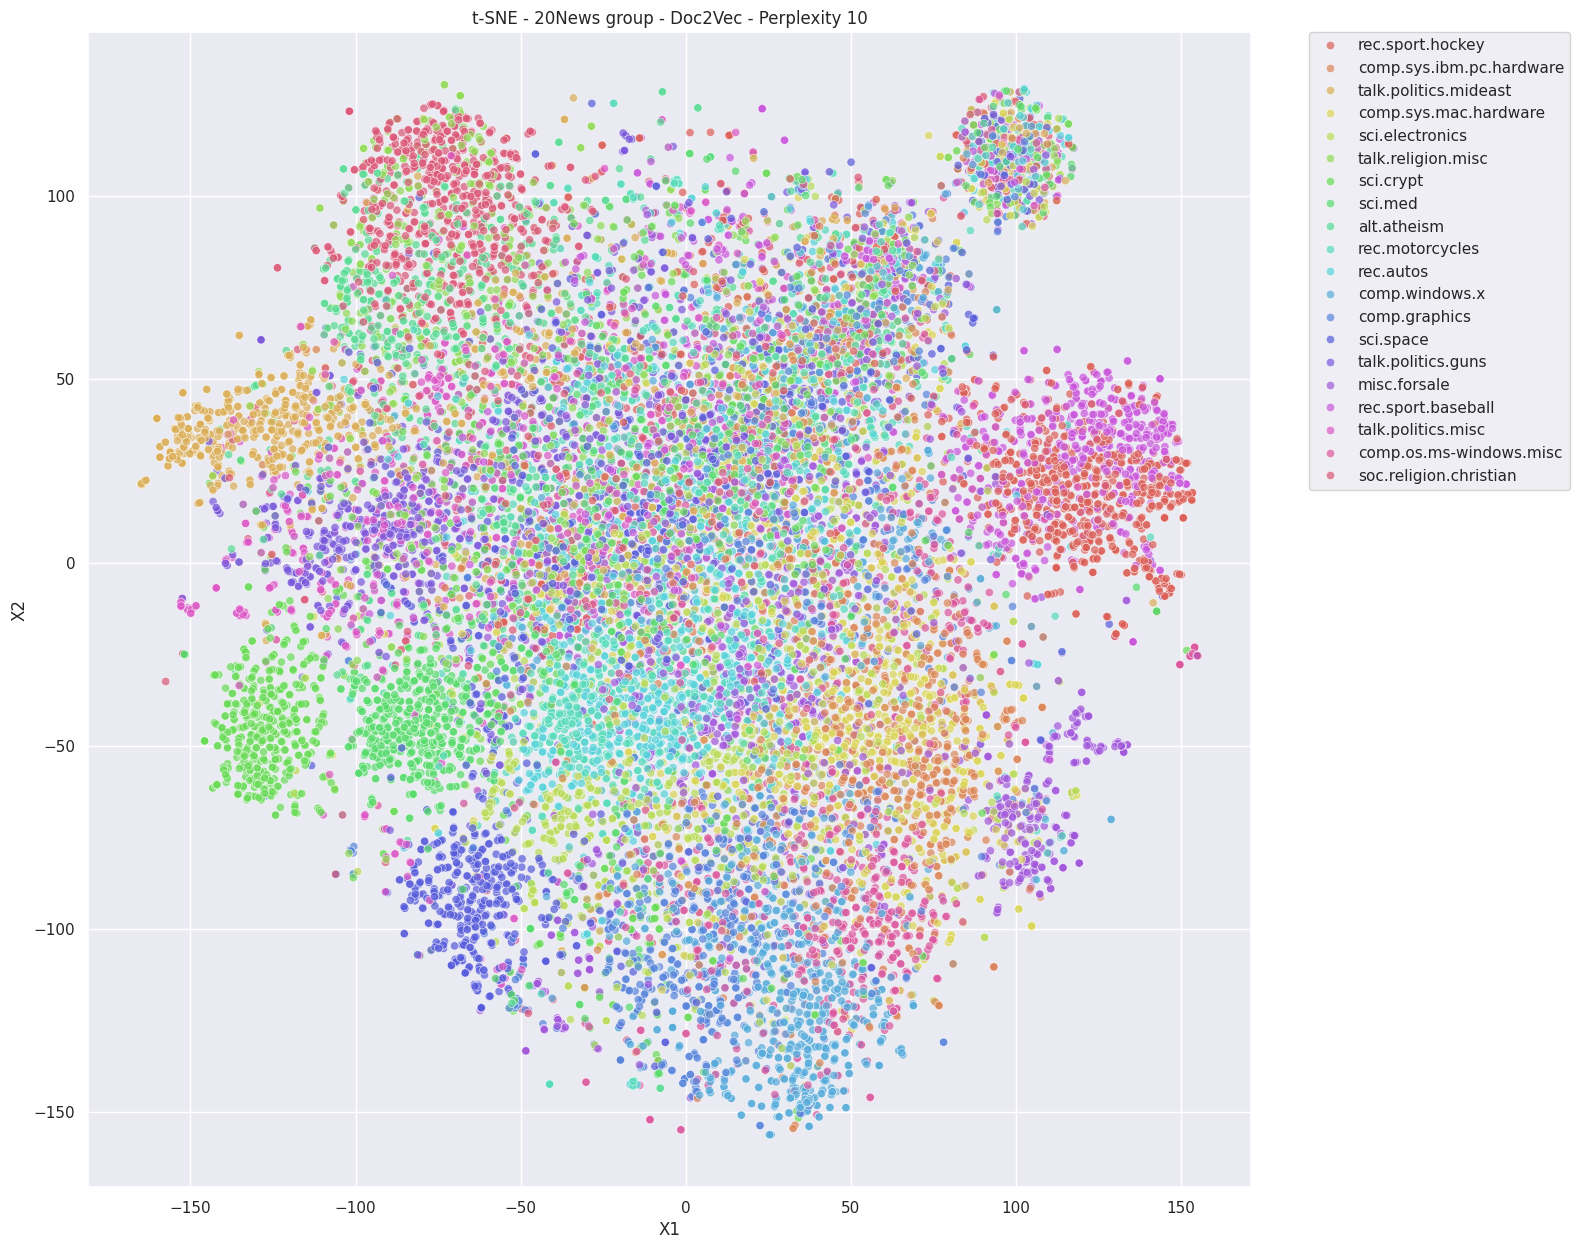

Perplexity: 30


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


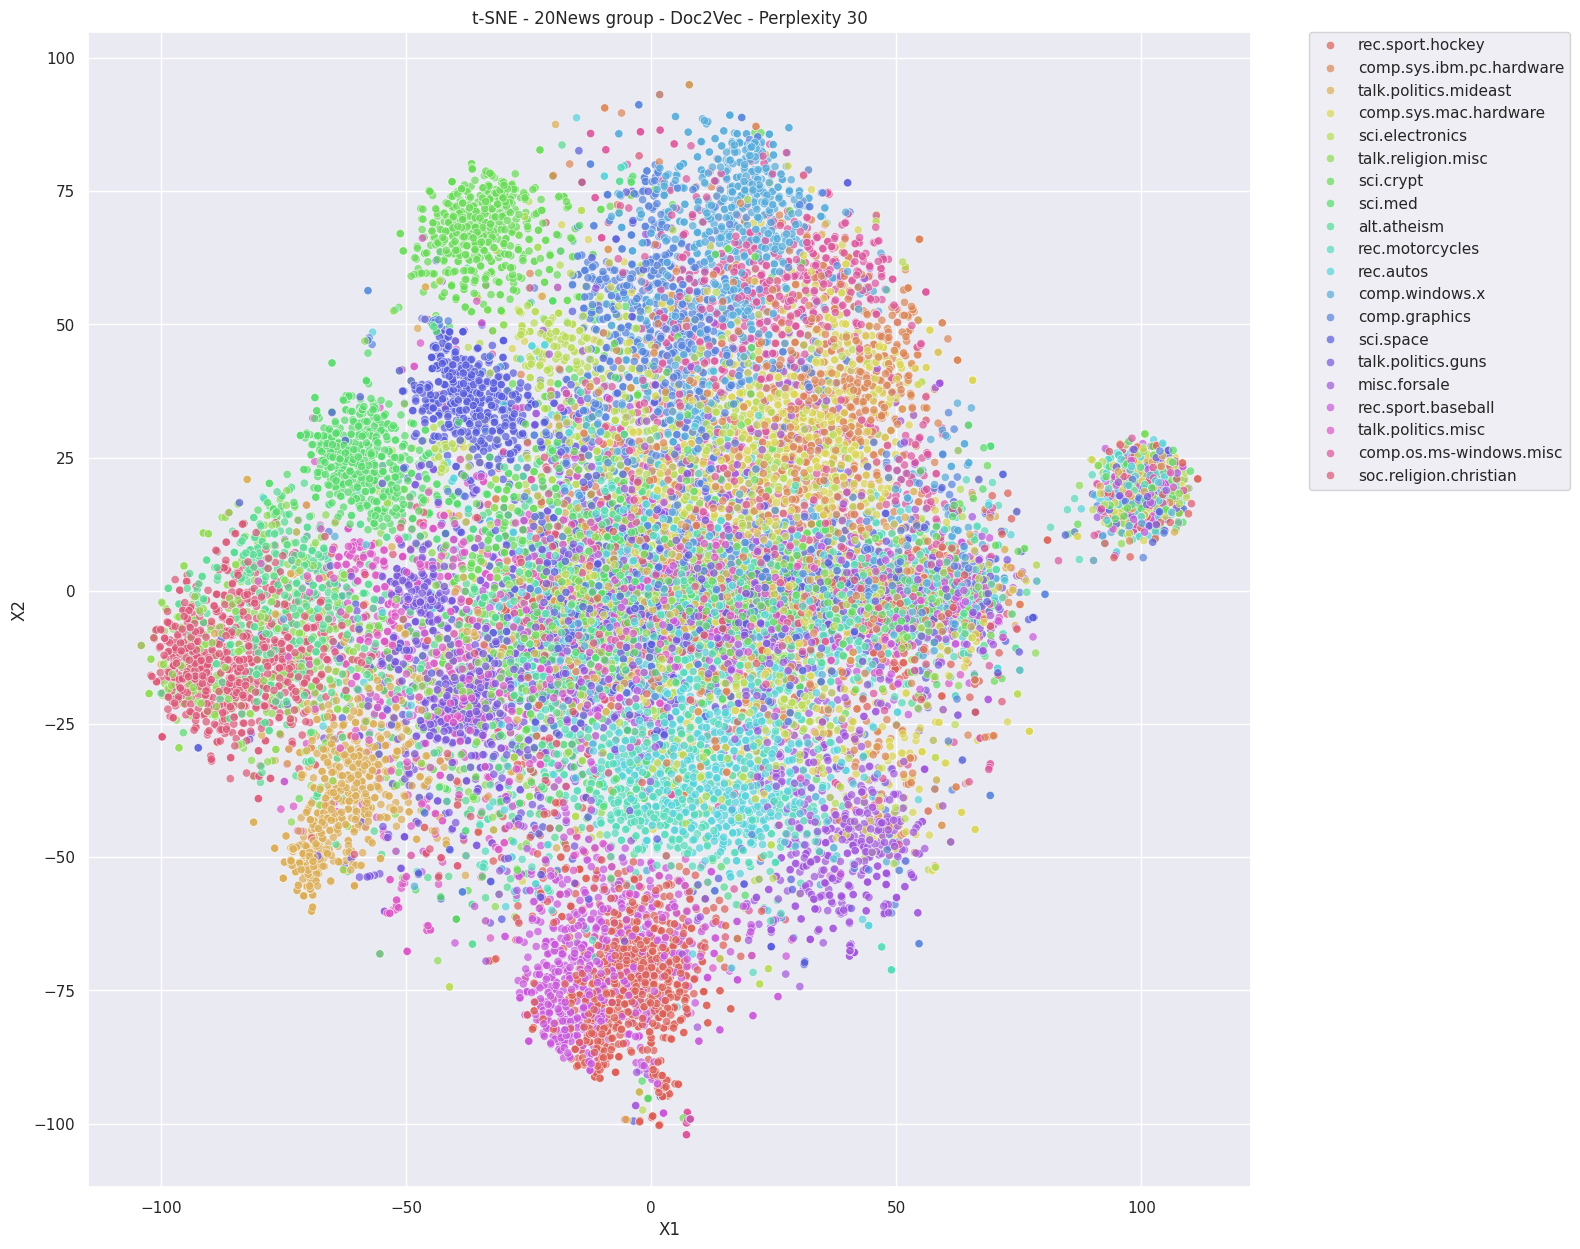

Perplexity: 50


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


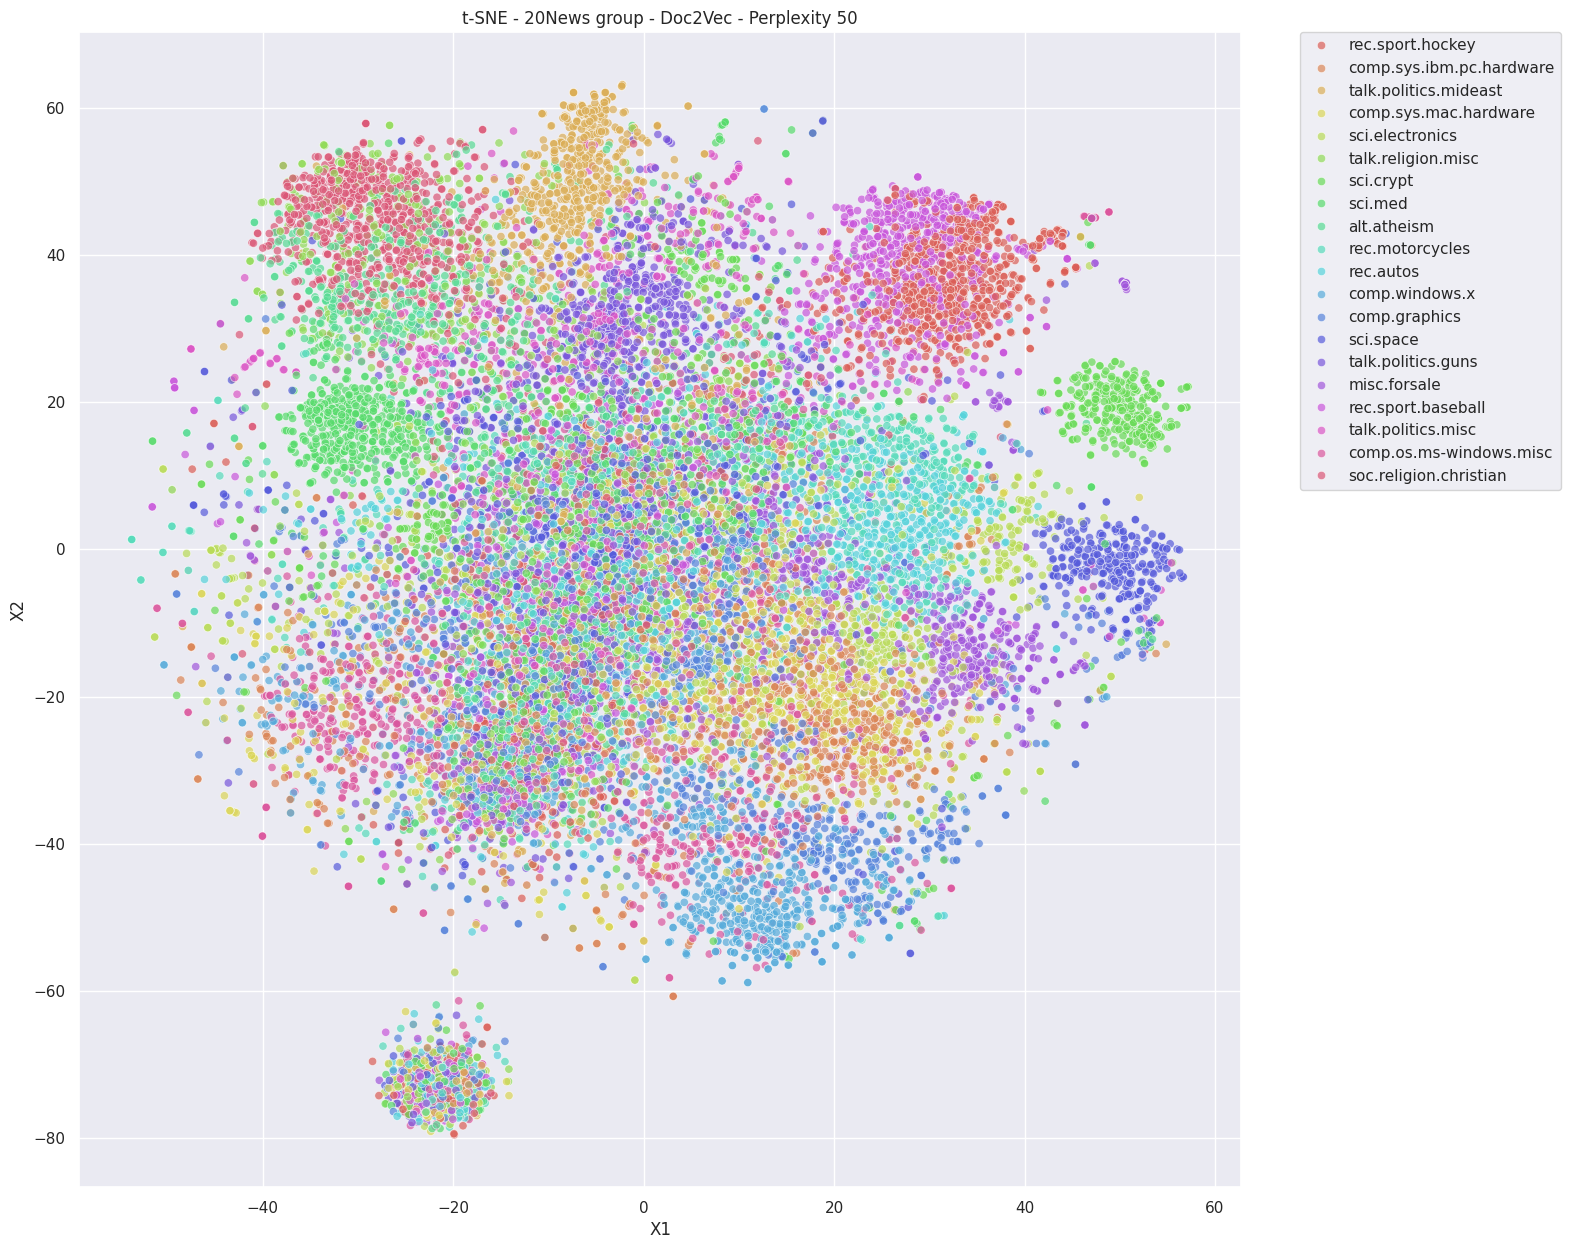

Perplexity: 100


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


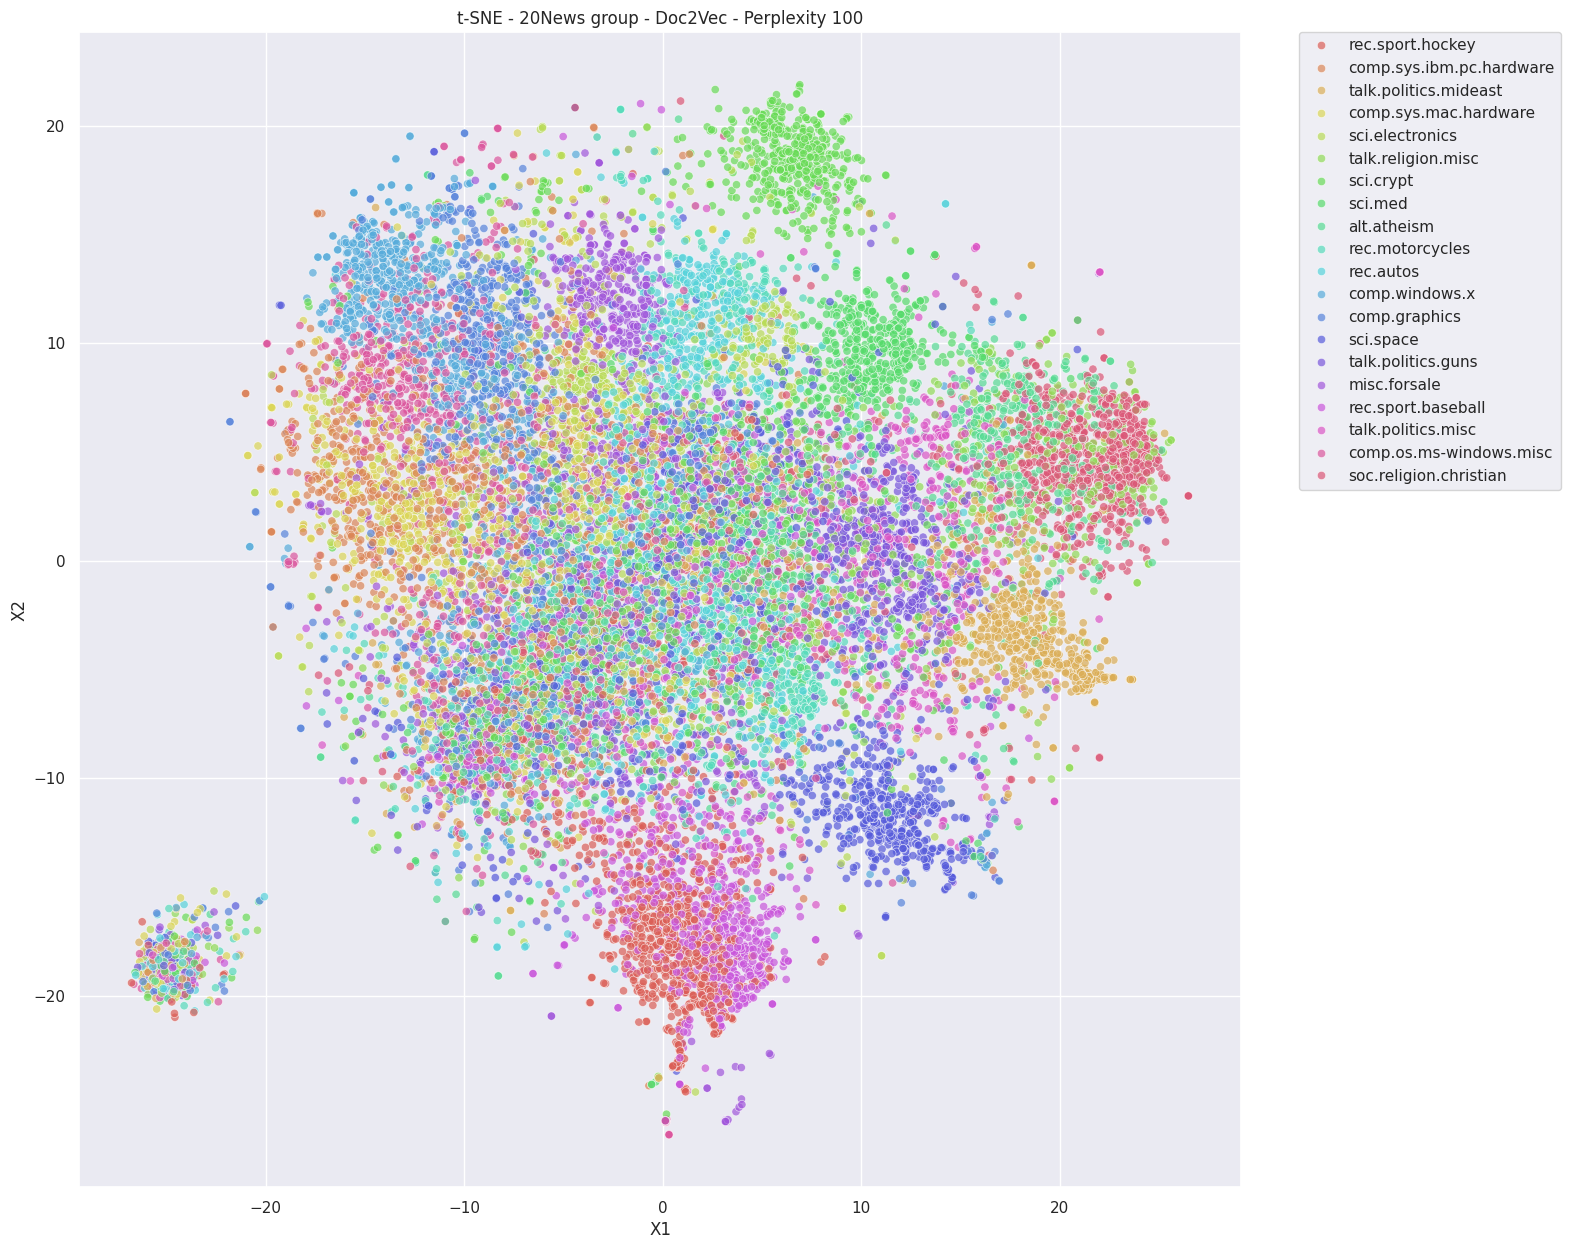

<Figure size 1500x1500 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Convertir a matriz NumPy
X = np.array(doc_vectors)
y = labels  # Etiquetas numéricas de los documentos
label_names = newsgroups_data.target_names

# Crear un diccionario para almacenar los resultados
perp_components = defaultdict(dict)

# Lista de valores de perplexity a probar
perplexities = [10, 30, 50, 100]

for perplexity_value in perplexities:
    print("Perplexity:", perplexity_value)

    # Aplicar t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity_value, init='random', n_iter=3000, random_state=42)
    X_embedded = tsne.fit_transform(X)

    # Almacenar los resultados
    perp_components[perplexity_value] = X_embedded

    # Crear un DataFrame para facilitar el plot
    import pandas as pd
    tsne_df = pd.DataFrame({
        'X1': X_embedded[:, 0],
        'X2': X_embedded[:, 1],
        'Label': [label_names[label] for label in y]
    })

    # Configuración de Seaborn
    sns.set(rc={'figure.figsize': (15, 15)})

    # Paleta de colores
    palette = sns.hls_palette(len(label_names))

    # Gráfico
    sns.scatterplot(
        x="X1", y="X2",
        hue="Label",
        palette=palette,
        data=tsne_df,
        legend="full",
        alpha=0.7
    )

    # Título y guardado
    title = f"t-SNE - 20News group - Doc2Vec - Perplexity {perplexity_value}"
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(f"{title}.png")
    plt.show()
    plt.clf()


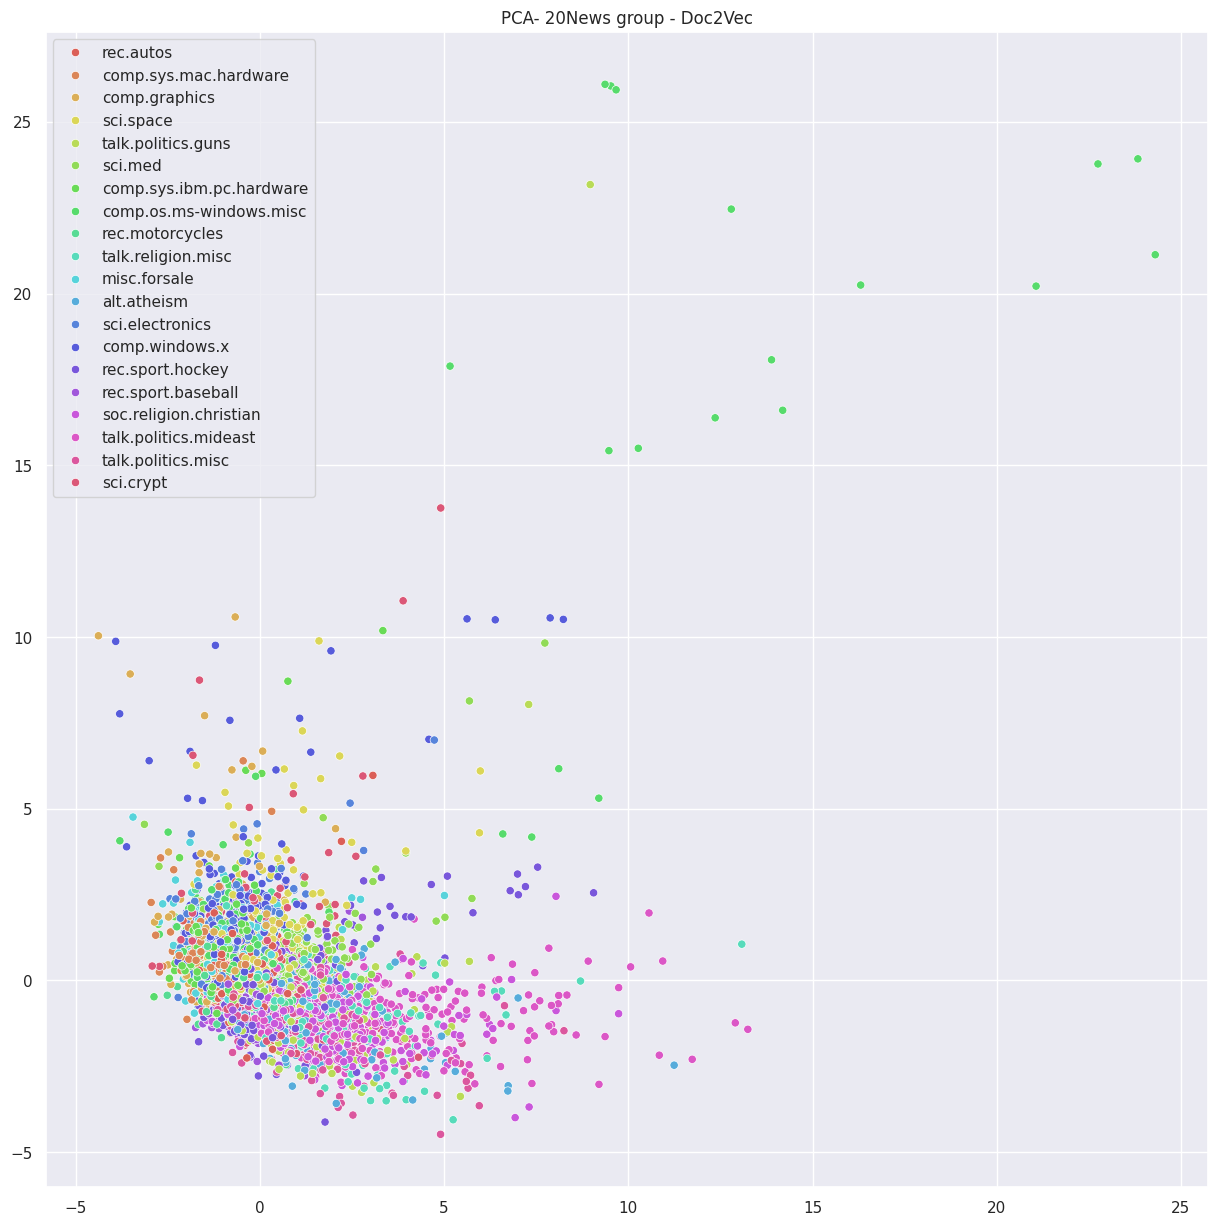

<Figure size 1500x1500 with 0 Axes>

In [ ]:
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

# Supongamos que 'df' contiene la columna 'data_str' con los textos y 'target_names' con las etiquetas

# Preparar los datos para Doc2Vec
documents = [TaggedDocument(simple_preprocess(text), [i]) for i, text in enumerate(df.data_str.values)]

# Inicializar el modelo Doc2Vec
vector_size = 100  # Puedes ajustar este tamaño
window_size = 5
epochs = 20
dm = 1  # Usar Distributed Memory (dm=1) o DBOW (dm=0)

# Entrenar el modelo Doc2Vec
model = Doc2Vec(vector_size=vector_size, window=window_size, min_count=2, workers=4, dm=dm)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=epochs)

# Obtener los vectores de documentos
doc_vectors = [model.dv[i] for i in range(len(documents))]

# Crear un diccionario para almacenar las proyecciones PCA
perp_components = defaultdict(dict)

# Ya que Doc2Vec no trabaja con n-gramas, repetimos el proceso solo para visualizar los datos
ngram = (1, 1)  # Doc2Vec no usa n-gramas, esto es solo para seguir el flujo del código
X_embedded = PCA(n_components=2).fit_transform(doc_vectors)

ngram_str = f"{ngram[0]}_{ngram[1]}"
perp_components[ngram_str] = X_embedded

# Configuración de Seaborn
sns.set(rc={'figure.figsize': (15, 15)})

# Paleta de colores basada en las categorías
palette = sns.color_palette("hls", len(set(df.target_names.values.tolist())))
y = df.target_names.values.tolist()

# Graficar
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, legend='full', palette=palette)

# Título y guardado
title = "PCA- 20News group - Doc2Vec"
plt.title(title)
plt.savefig(f"{title}.png")
plt.show()

# Limpiar la figura para el siguiente plot (si se necesitan más)
plt.clf()
